# Assignment 7: PCA and K-means Clustering with Iris Dataset

**Course:** Introduction to Machine Learning for Social Science<br>
**Course Code:** CSS5230<br>
**Teacher:** [Sahba Zojaji](https://myweb.cuhk.edu.cn/sahbazojaji/Home/Index)<br>
**University:** The Chinese University of Hong Kong, Shenzhen

---

## **Summary**
This notebook provides an introduction to <u>Principal Component Analysis (PCA)</u> for dimensionality reduction and <u>K-means</u> clustering for unsupervised learning, using the classic Iris dataset. 

### Iris Dataset

The **Iris flower dataset** is a foundational dataset in machine learning and statistics. Collected by Ronald Fisher in 1936, it contains:

- 150 samples of iris flowers (50 per species)
- 3 species: *Iris setosa*, *Iris versicolor*, and *Iris virginica*
- 4 features for each sample:
  - Sepal length (cm)
  - Sepal width (cm) 
  - Petal length (cm)
  - Petal width (cm)

## Goal:

Apply **PCA** for dimensionality reduction and **K-means** for clustering on the Iris dataset. Evaluate results by comparing clusters with true species labels.

## **<span style="color:green">A. Principal Component Analysis (PCA)</span>**
To perform Principal Component Analysis (PCA) on the Iris dataset, we follow the following steps:
- **Import necessary libraries**: Load essential libraries for data manipulation, visualization, and PCA.
- **Load the data**: Import the Iris dataset and create a DataFrame for easier manipulation and visualization.
- **Standardize the data**: Normalize the data to ensure each feature has zero mean and unit variance, which is crucial for PCA.
- **Apply PCA to reduce dimensionality**: Perform PCA on the standardized data and create a DataFrame with the principal components.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map({i: target_names[i] for i in range(3)})

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['species'] = iris_df['species']

### Visualizations of PCA on Iris Dataset

After performing PCA on the Iris dataset, we visualize the results to gain insights into the data's structure and the effectiveness of the dimensionality reduction. The visualizations include:

- **Scree Plot**: Shows the variance explained by each principal component.
- **PCA Component Loadings**: Displays the contribution of each original feature to the principal components.
- **2D PCA Projection**: Visualizes the data in a 2-dimensional space using the first two principal components.
- **3D PCA Projection**: Visualizes the data in a 3-dimensional space using the first three principal components.

#### 1. Scree Plot - Variance Explained by Each Component
- **Purpose**: To show the proportion of variance captured by each principal component.
- **Visualization**: A bar plot displaying the explained variance ratio for each component, along with a step plot showing the cumulative explained variance.

#### 2. PCA Components (Loadings)
- **Purpose**: To understand how each original feature contributes to the principal components.
- **Visualization**: A heatmap showing the loadings of each feature on the principal components.

#### 3. 2D PCA Plot
- **Purpose**: To visualize the data in a 2-dimensional space using the first two principal components.
- **Visualization**: A scatter plot with points colored by species, showing the separation of different species in the reduced space.

#### 4. 3D PCA Plot
- **Purpose**: To visualize the data in a 3-dimensional space using the first three principal components.
- **Visualization**: A 3D scatter plot with points colored by species, providing a more detailed view of the data's structure.

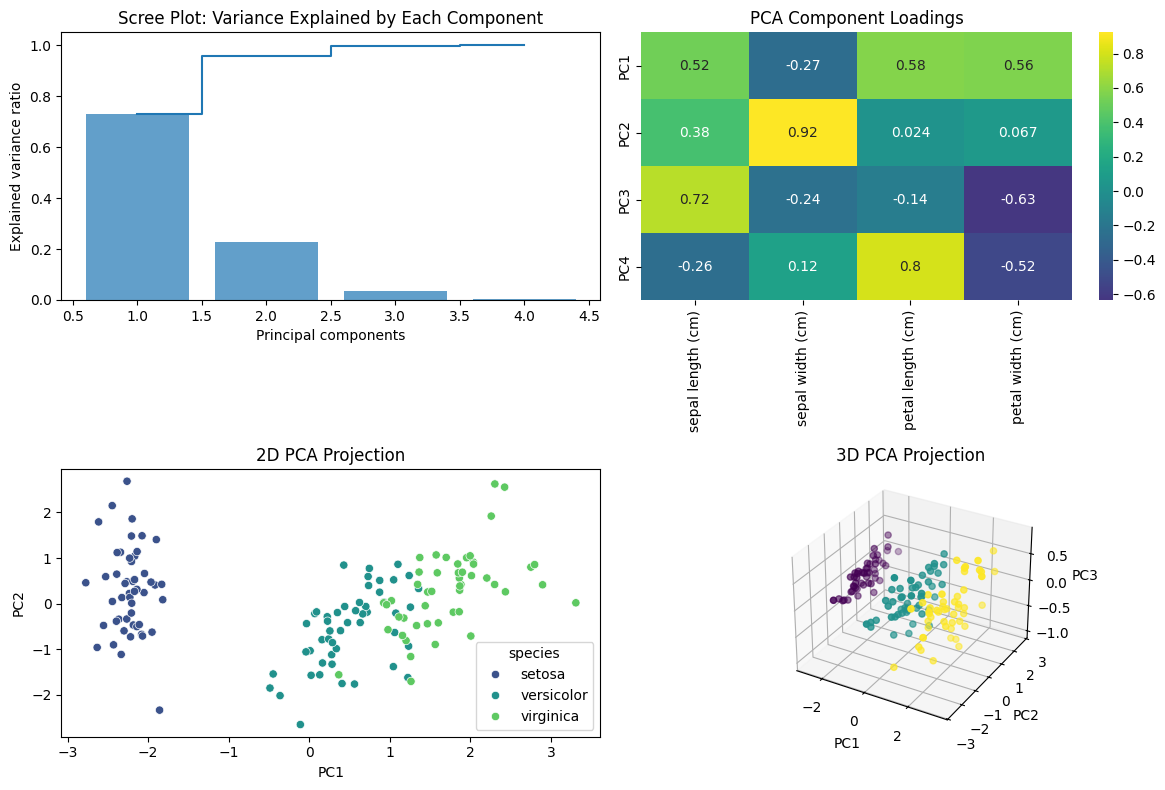

Original feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]

Cumulative explained variance: [0.72962445 0.95813207 0.99482129 1.        ]

PCA components (loadings):
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.521066         -0.269347           0.580413          0.564857
PC2           0.377418          0.923296           0.024492          0.066942
PC3           0.719566         -0.244382          -0.142126         -0.634273
PC4          -0.261286          0.123510           0.801449         -0.523597


In [2]:
# Visualizations
plt.figure(figsize=(12, 8))

# 1. Scree Plot - Variance explained by each component
plt.subplot(2, 2, 1)
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.step(range(1, 5), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot: Variance Explained by Each Component')

# 2. PCA Components (Loadings)
plt.subplot(2, 2, 2)
components = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3', 'PC4'])
sns.heatmap(components, cmap='viridis', annot=True, center=0)
plt.title('PCA Component Loadings')

# 3. 2D PCA Plot
plt.subplot(2, 2, 3)
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis')
plt.title('2D PCA Projection')

# 4. 3D PCA Plot 
ax = plt.subplot(2, 2, 4, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection')

plt.tight_layout()
plt.show()

# Print important information
print("Original feature names:", feature_names)
print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("\nCumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))
print("\nPCA components (loadings):\n", components)

# <span style="color:red">PCA Configuration Assignment (5 points)</span>

## Objective
Explore the impact of different parameters on the performance of a PCA model trained on the Iris dataset.

## Instructions:
1. Modify PCA Configuration and experiment with

   - Number of components: Try 2 and 3.


For each combination, provide the outputs of metrics, such as the cumulative explained variance, component loadings, and the scree plot for different combinations of parameters in your report.


**At least 2 combinations must be included in your final report.**

## **<span style="color:green">B. K-Means Clustering</span>**
To perform K-Means clustering on the Iris dataset, we follow the following steps:
- **Import necessary libraries:** Load essential libraries for clustering, evaluation, and visualization.
- **Load the data:** Import the Iris dataset and use the PCA-reduced data (first 2 components) for clustering.
- **Determine optimal number of clusters:** Use the Elbow Method and Silhouette Score to find the optimal number of clusters.
- **Perform K-Means clustering with optimal K:** Apply K-Means clustering using the optimal number of clusters.


### Elbow Method
- **Description:** A graphical technique to find the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k). The "elbow" point indicates diminishing returns in variance reduction.
- **Interpretation:** Choose the number of clusters at the "elbow" point where WCSS starts to level off.
  
### Silhouette Score
- **Description:** Measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters.
- **Interpretation:** Choose the number of clusters that maximizes the Silhouette Score for the best separation between clusters.


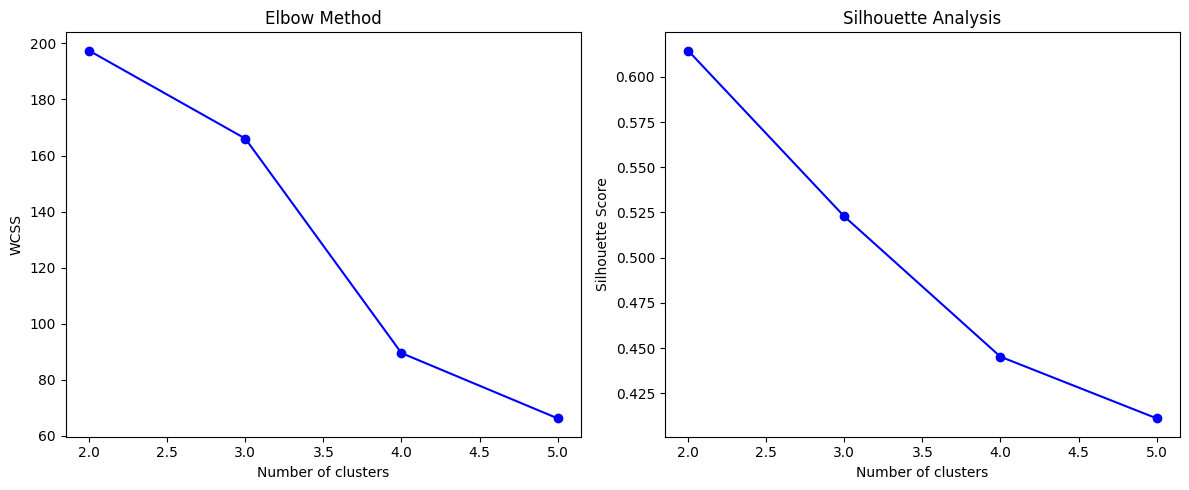

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.metrics import classification_report
from scipy.optimize import linear_sum_assignment  # For Hungarian algorithm
import numpy as np
import matplotlib.pyplot as plt

# Using PCA-reduced data (first 2 components)
X_reduced = X_pca[:, :2]

# 1. Determine optimal number of clusters
wcss = []
silhouette_scores = []
k_range = range(2, 6)

plt.figure(figsize=(12, 5))

# Elbow Method
plt.subplot(1, 2, 1)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Silhouette Score
plt.subplot(1, 2, 2)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_reduced)
    silhouette_scores.append(silhouette_score(X_reduced, clusters))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

# 2. Perform K-means with optimal K
optimal_k = 3  # We know Iris has 3 species
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

# 3. Align cluster labels with true labels
def align_clusters(y_true, y_pred):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Find optimal assignment
    row_ind, col_ind = linear_sum_assignment(-cm)
    # Create mapping
    mapping = {pred: true for pred, true in zip(col_ind, row_ind)}
    # Remap predictions
    aligned = np.array([mapping[p] for p in y_pred])
    return aligned

aligned_clusters = align_clusters(y, clusters)

### Visualizations of K-Means Clustering on Iris Dataset
After performing K-Means clustering on the Iris dataset, we visualize the results to gain insights into the clustering performance and compare the clusters with the true labels. The visualizations include:
- K-means Clustering: Shows the clusters found by K-means and the cluster centers.
- True Labels: Displays the true labels of the data points for comparison.

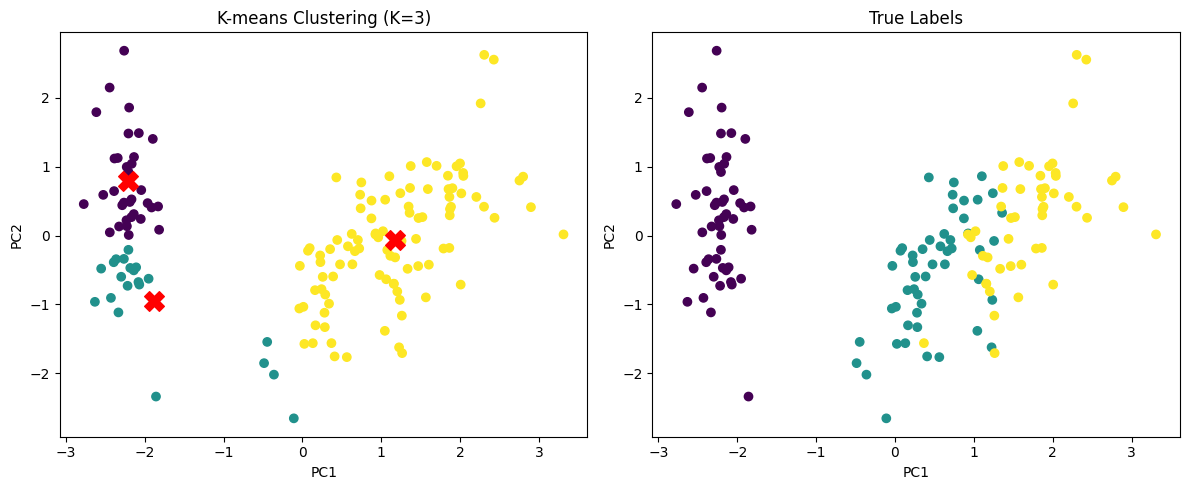


Cluster centers:
 [[ 1.1733857  -0.06642542]
 [-2.21642532  0.79656148]
 [-1.88109485 -0.94808038]]

Silhouette Score: 0.5227910941742375

Confusion Matrix:
 [[33 17  0]
 [ 0  4 46]
 [ 0  0 50]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.66      0.80        50
           1       0.19      0.08      0.11        50
           2       0.52      1.00      0.68        50

    accuracy                           0.58       150
   macro avg       0.57      0.58      0.53       150
weighted avg       0.57      0.58      0.53       150



In [8]:
# 4. Visualize clusters
plt.figure(figsize=(12, 5))

# Clusters found by K-means
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=aligned_clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, marker='X', c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-means Clustering (K={optimal_k})')

# True labels
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('True Labels')

plt.tight_layout()
plt.show()

# 5. Evaluate clustering performance
print("\nCluster centers:\n", kmeans.cluster_centers_)
print("\nSilhouette Score:", silhouette_score(X_reduced, clusters))

# Evaluation with aligned clusters
print("\nConfusion Matrix:\n", confusion_matrix(y, aligned_clusters))
print("\nClassification Report:\n", 
      classification_report(y, aligned_clusters, zero_division=0))

# <span style="color:red">K-Means Hyperparameter Tuning Assignment (5 points)</span>

## Objective
Explore the impact of different Hyperparameters on the performance of a K-Means clustering model trained on the Iris dataset.


## Instructions:
Experiment with:
- Number of clusters (k): Try 2, 3, 4.
- Initialization method: Try k-means++ and random.
- Maximum number of iterations.

For each combination:
- Record the Silhouette Score.
Plot the cluster assignments and cluster centers.
Provide the outputs of metrics, the confusion matrix, and the classification report for different combinations of hyperparameters in your report..


**At least 2 combinations must be included in your final report.**